### Import Necessary Libraries

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
import warnings
import math
from scipy import stats

#### Global Settings

In [43]:
warnings.filterwarnings('ignore')
rcParams['figure.figsize'] = 12, 6
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))

### Loading data and data familiarity

In [44]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [45]:
data_info = f"train dataframe shape: {df_train.shape} \ntest dataframe shape: {df_test.shape}"
print(data_info)

train dataframe shape: (1460, 81) 
test dataframe shape: (1459, 80)


In [46]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [47]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.000,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.000,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.000,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.000,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.000,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


#### Droping un-useful columns

In [48]:
df_train.drop('Id' , inplace = True, axis = 1)

#### Correlation Analysis

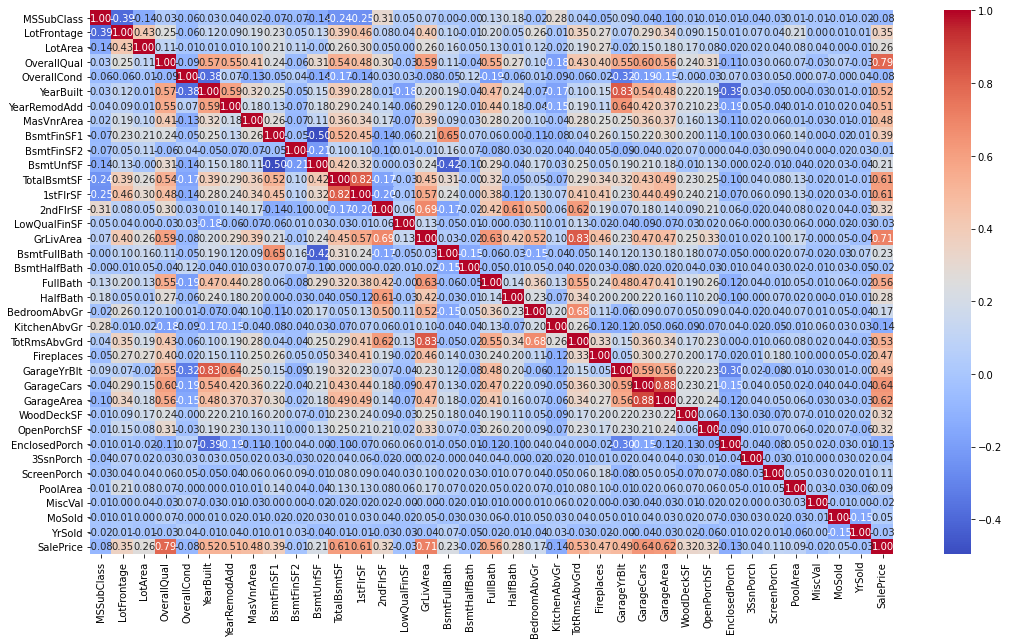

In [49]:
correlation_matrix = df_train.corr(method = "pearson")

plt.figure(figsize = (18, 10))
sns.heatmap(correlation_matrix, cmap = 'coolwarm', annot = True, fmt = '.2f')
plt.show()

#### Features with correlation above 50

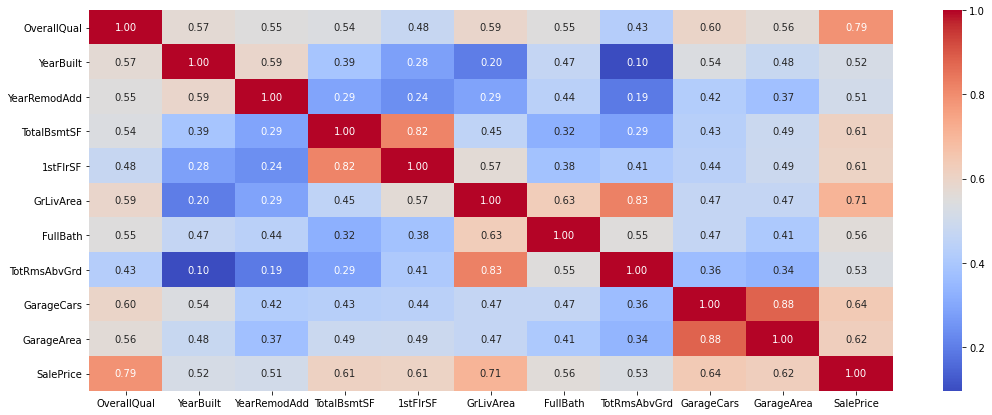

In [50]:
top_twenty = correlation_matrix.index[abs(correlation_matrix['SalePrice']) >= 0.5]

plt.figure(figsize = (18, 7))
sns.heatmap(df_train[top_twenty].corr(), cmap = 'coolwarm', annot = True, fmt = '.2f')
plt.show()

#### Multicollinearlity Analysis

Multicollinearity refers to a situation in which more than two explanatory variables in a multiple regression model are highly linearly related. Below are few of the multicollinear features based on correlation matrix.

In [51]:
# function to plot scatter plots in a grid
def scatter_plot_grid(features_list, dataframe):
    nrows = math.ceil(len(features_list)/ 2)
    ncols = 2
    row = 0
    col = 0

    fig, axes = plt.subplots(nrows = nrows, ncols = ncols, figsize = (12, 23))

    for i, _ in enumerate(range(len(features_list))):
        sns.regplot(ax = axes[row, col], x =top_twenty[i], y = 'SalePrice', data = dataframe)
        col += 1
        if col == 2:
            row += 1
            col = 0
            continue
        
    

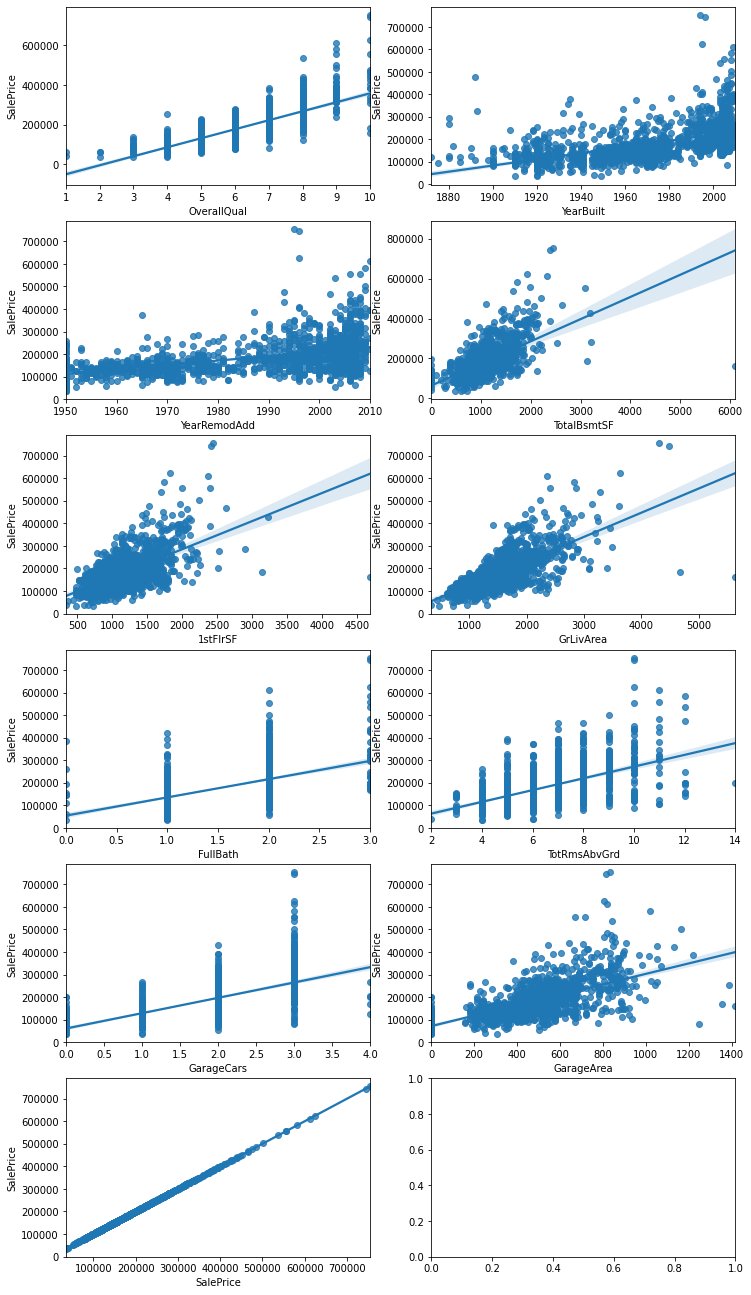

In [52]:
scatter_plot_grid(top_twenty, df_train)

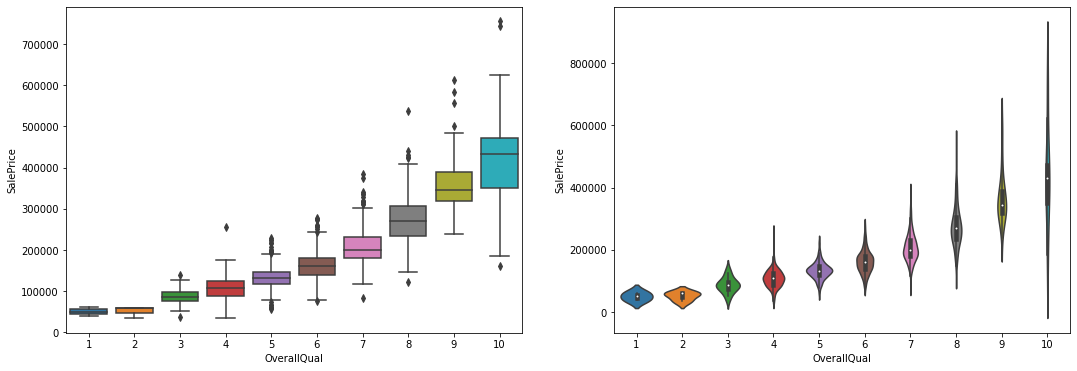

In [53]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 6))
sns.boxplot(ax = axes[0], x = 'OverallQual', y = 'SalePrice', data = df_train)
sns.violinplot(ax = axes[1], x = 'OverallQual', y = "SalePrice", data = df_train)
plt.show()

#### Outlier Removal

0
Shape of train data= (1460, 80)
Shape of train data= (1460, 80)
1
Shape of train data= (1460, 80)
Shape of train data= (1458, 80)
0
Shape of train data= (1458, 80)
Shape of train data= (1454, 80)
1
Shape of train data= (1454, 80)
Shape of train data= (1452, 80)
0
Shape of train data= (1452, 80)
Shape of train data= (1452, 80)
1
Shape of train data= (1452, 80)
Shape of train data= (1449, 80)
0
Shape of train data= (1449, 80)
Shape of train data= (1449, 80)
1
Shape of train data= (1449, 80)
Shape of train data= (1447, 80)
0
Shape of train data= (1447, 80)
Shape of train data= (1445, 80)
1
Shape of train data= (1445, 80)
Shape of train data= (1443, 80)
0
Shape of train data= (1443, 80)
Shape of train data= (1441, 80)
1
Shape of train data= (1441, 80)
Shape of train data= (1439, 80)
0
Shape of train data= (1439, 80)
Shape of train data= (1435, 80)
1
Shape of train data= (1435, 80)
Shape of train data= (1433, 80)
0
Shape of train data= (1433, 80)
Shape of train data= (1431, 80)
1
Shape of

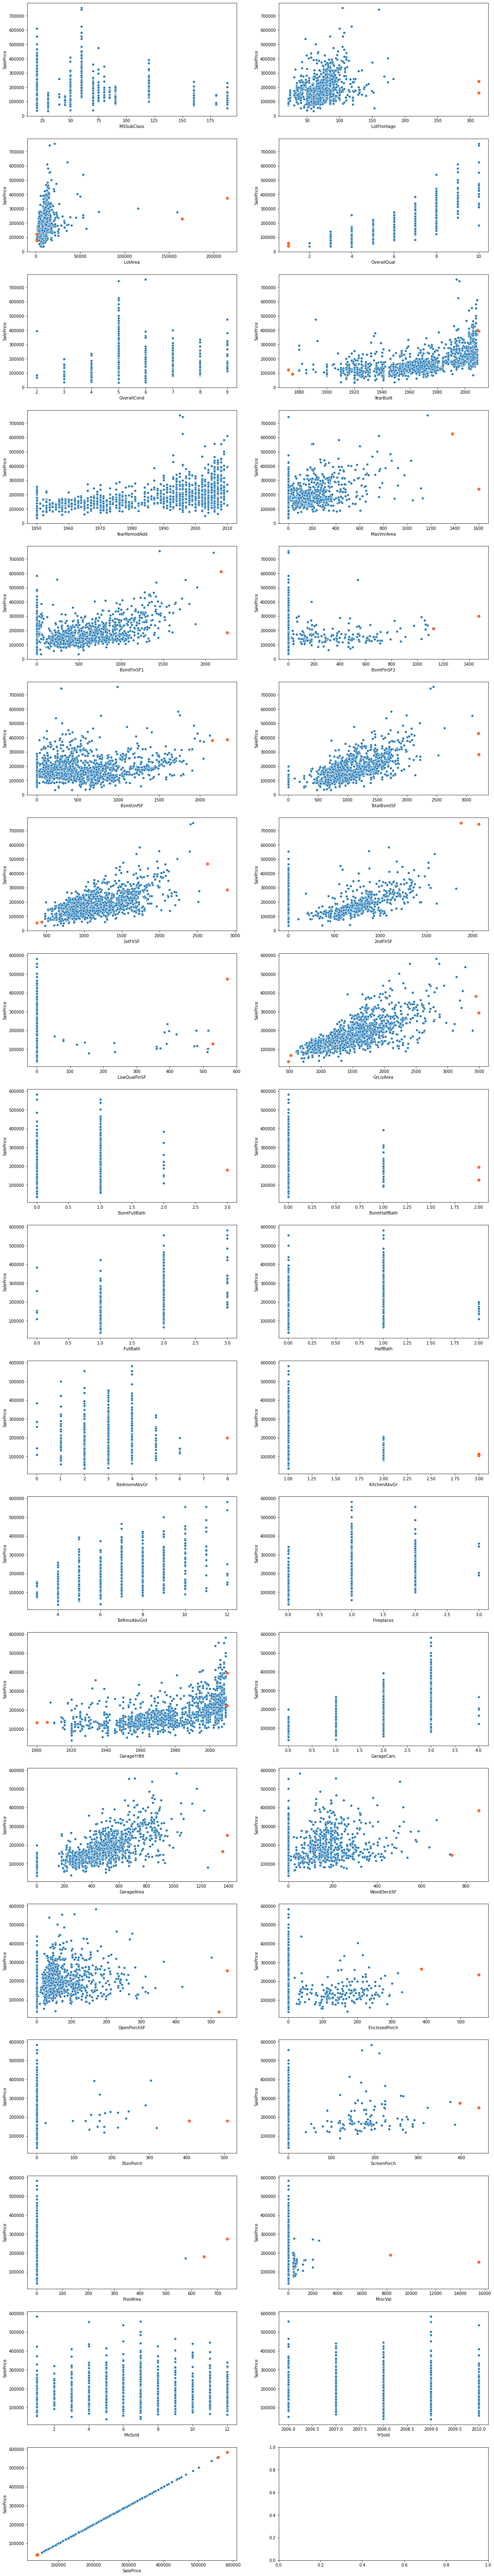

In [54]:
outliers = []
row = 0
col = 0
numeric_features = df_train.select_dtypes(include = ['int64', 'float64']).columns

nrows = math.ceil(len(numeric_features)/ 2)
ncols = 2
    
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, figsize = (20, nrows * 6))

for feature in numeric_features:
    print(col)
    if col == 'YrSold':
        continue
        
    min_threshold = df_train[feature].quantile(0.001)
    max_threshold = df_train[feature].quantile(0.999)
    df_outliers = df_train[(df_train[feature] < min_threshold) | \
                              (df_train[feature] > max_threshold)]
    
    outliers = df_outliers.index.tolist()
#     print(outliers)
    
    sns.scatterplot(ax = axes [row, col], x = feature, y = "SalePrice", data = df_train)
    sns.scatterplot(ax = axes [row, col], x = feature, y = "SalePrice", data = df_outliers, edgecolor ="red")
                    

   # drop outliers from original dataset

    print(f'Shape of train data= {df_train.shape}')
    unique_outliers= list(set(outliers))
    df_train = df_train.drop(unique_outliers)
    df_train.reset_index(drop = True, inplace = True)
    print(f'Shape of train data= {df_train.shape}')
#     clear list afterwards
    outliers.clear()
                    
    
    col += 1
    if col == 2:
            row += 1
            col = 0
            continue
    


In [55]:
df_train.shape

(1397, 80)

## Data Preprocessing

- So far we have good insights into our data and we understand the correlation between features and the target variables.

- In this step we are going to drop unuseful features, identify null values, fix the datatypes of the features and we will also group the features based on the data they contain.

- Since we have test data also available we will combine train and test sets, preprocess, and divide them again.

#### Delete unusefull Features

- Before we start imputing missing values, lets first delete the unusefull features from the dataset.

- 'Utilities' feature contains almost all the values of one type of utility only. Since it wont be usefull in modeling we can drop this feature.

- 'Street' feature also contains the unbalance data of type of road access to property. We can drop it.

- 'PoolQC' most of the data is missing for this feature, we can drop it.

In [56]:
y_train = df_train.pop('SalePrice')
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [57]:
df_train = pd.concat([df_train, df_test]).reset_index(drop = True) 
#  Drops the current index of the DataFrame and replaces it with an index of increasing integers

In [58]:
df_train.shape

(2856, 80)

In [59]:
df_train = df_train.drop('Id', axis = 1)
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [60]:
for col in df_train.select_dtypes(include = ['object']):
    print(f"============================{col}===============================")
    print(df_train[col].value_counts())

============================MSZoning===============================
RL         2222
RM          446
FV          138
RH           25
C (all)      21
Name: MSZoning, dtype: int64
============================Street===============================
Pave    2845
Grvl      11
Name: Street, dtype: int64
============================Alley===============================
Grvl    118
Pave     73
Name: Alley, dtype: int64
============================LotShape===============================
Reg    1826
IR1     942
IR2      74
IR3      14
Name: LotShape, dtype: int64
============================LandContour===============================
Lvl    2571
HLS     118
Bnk     113
Low      54
Name: LandContour, dtype: int64
============================Utilities===============================
AllPub    2853
NoSeWa       1
Name: Utilities, dtype: int64
============================LotConfig===============================
Inside     2086
Corner      499
CulDSac     172
FR2          85
FR3          14
Name: LotConfig

In [61]:
df_train['Utilities'].value_counts()

AllPub    2853
NoSeWa       1
Name: Utilities, dtype: int64

In [62]:
df_train['Street'].value_counts()

Pave    2845
Grvl      11
Name: Street, dtype: int64

In [63]:
df_train['PoolQC'].value_counts()

Ex    2
Gd    2
Name: PoolQC, dtype: int64

Since most of these features are ubalanced and some having no value, we can drop them

In [64]:
df_train = df_train.drop(['Utilities', 'Street', 'PoolQC',], axis=1)
print('Shape of all_data= {}'.format(df_train.shape))

Shape of all_data= (2856, 76)


- MSSubClass: Identifies the type of dwelling involved in the sale. Its data type is int64 and values are incremental order starting from 20 upto 190. If we keep it as it is then our model may give more importance to MSSubClass 190 houses over MSSubClass 20 houese. In order to avoid that we will change its data type to 'str' and treat this as categorical variable.

- YrSold: Contains year values like 2008, 2007, 2006, 2009, 2010. Since we have sufficient data for each value we will change its data type to 'str' and treat this as categorical variable.

- MoSold: Since we have sufficient data for each value we will change its data type to 'str' and treat this as categorical variable.

- We are not changing the data type of 'YearBuilt', 'YearRemodAdd' and 'GarageYrBlt' to 'str'. They have linear relationship with SalePrice, model will benefit from this relationship instaed of converting it into categories. (Also we dont have sufficient training examples for each unique value)

In [65]:
for col in ('MSSubClass', 'YrSold', 'MoSold'):
    df_train[col] = df_train[col].astype(str)

#### Checking For Messing Values

In [66]:
null_cols = df_train.columns[df_train.isna().any()]
null_cols_cnt = df_train[null_cols].isna().sum()
null_cols_percentages = (null_cols_cnt / len(df_train)) *100
null_info_df = pd.DataFrame({"Null value Count" : null_cols_cnt, "Null value %" : null_cols_percentages},
                           index = null_cols)
null_info_df = null_info_df.sort_values(by = "Null value %", ascending = False)

In [67]:
null_info_df

,Null value Count,Null value %
MiscFeature,2757,96.534
Alley,2665,93.312
Fence,2300,80.532
FireplaceQu,1398,48.950
LotFrontage,474,16.597
GarageCond,148,5.182
GarageYrBlt,148,5.182
GarageFinish,148,5.182
GarageQual,148,5.182
GarageType,146,5.112


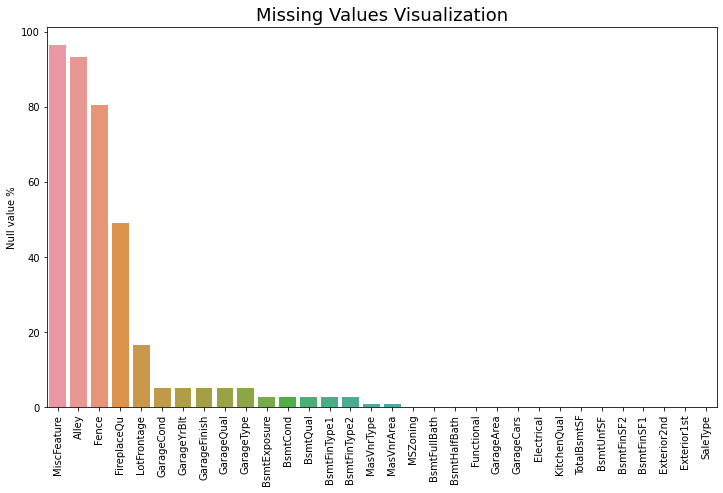

In [68]:
plt.figure(figsize = (12, 7))
sns.barplot(x = null_info_df.index, y = null_info_df["Null value %"])
plt.xticks(rotation = 90)
plt.title("Missing Values Visualization", fontsize = 18)
plt.show()

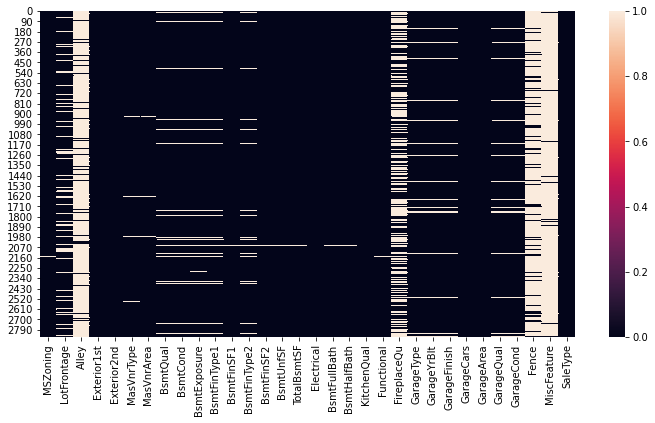

In [69]:
sns.heatmap(df_train[null_cols].isnull())
plt.show()

#### Imputing Missing Values

- We will replace the categorical ordinal as well as nominal features missing values with 'None'
- In case of nominal feature it will become one of the category and in case of ordinal feature it will be trated as least order value.
- Always try to use 'None' if null value percentage is higher, to avoid the imbalance data.

In [70]:
for col in df_train.select_dtypes(include = ["object", "category"]):
    df_train[col] = df_train[col].fillna("None")
    print("="*60)
    print(f"{col} : Null count: {df_train[col].isnull().sum()} Unique values: {df_train[col].unique()}")

MSSubClass : Null count: 0 Unique values: ['60' '20' '70' '50' '190' '45' '90' '120' '85' '80' '160' '75' '30' '180'
 '40' '150']
MSZoning : Null count: 0 Unique values: ['RL' 'RM' 'FV' 'C (all)' 'RH' 'None']
Alley : Null count: 0 Unique values: ['None' 'Grvl' 'Pave']
LotShape : Null count: 0 Unique values: ['Reg' 'IR1' 'IR2' 'IR3']
LandContour : Null count: 0 Unique values: ['Lvl' 'Bnk' 'HLS' 'Low']
LotConfig : Null count: 0 Unique values: ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope : Null count: 0 Unique values: ['Gtl' 'Mod' 'Sev']
Neighborhood : Null count: 0 Unique values: ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1 : Null count: 0 Unique values: ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 : Null count: 0 Unique values: ['Norm' 'A

- **LotFrontage**: Linear feet of street connected to property. Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood, we can fill in missing values by the median LotFrontage of the neighborhood.
- Since 'LotFrontage containes continuous data we are taking 'median' value.

In [71]:
df_train["LotFrontage"] = df_train.groupby("Neighborhood")["LotFrontage"].transform(lambda x : x.median())

In [72]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,70.000,8450,None,Reg,Lvl,Inside,Gtl,CollgCr,...,0,0,0,None,None,0,2,2008,WD,Normal
1,20,RL,80.000,9600,None,Reg,Lvl,FR2,Gtl,Veenker,...,0,0,0,None,None,0,5,2007,WD,Normal
2,60,RL,70.000,11250,None,IR1,Lvl,Inside,Gtl,CollgCr,...,0,0,0,None,None,0,9,2008,WD,Normal
3,70,RL,70.000,9550,None,IR1,Lvl,Corner,Gtl,Crawfor,...,0,0,0,None,None,0,2,2006,WD,Abnorml
4,60,RL,88.000,14260,None,IR1,Lvl,FR2,Gtl,NoRidge,...,0,0,0,None,None,0,12,2008,WD,Normal


##### Replace numberic features with one before

In [73]:
for col in df_train.select_dtypes(include = ['int64', 'float64']):
    df_train[col] = df_train[col].fillna(method ='bfill')

#### Replace with Most Frequent Value

For low percentage of null values, we will use most frequent value to replace the categorical missing value.

In [74]:
for col in ('MSZoning','Electrical','KitchenQual','Exterior1st','Exterior2nd', 'SaleType'):
    df_train[col] = df_train[col].replace({"None" : df_train[col].mode()[0]})

#### Final cross check for missing values

In [75]:
print(f"Missing values count: {df_train.isnull().sum().sum()}")

Missing values count: 0


<AxesSubplot:>

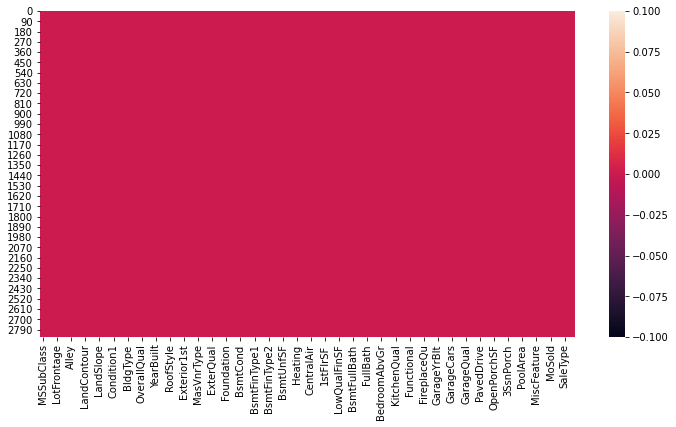

In [76]:
sns.heatmap(df_train.isnull())

## Feature Engineering

#### Remove Multicollinear Feature

Method: [Variance Inflation Factor](https://www.investopedia.com/terms/v/variance-inflation-factor.asp) 

- Method get_highest_vif_feature() will find all the features with [VIF](https://www.investopedia.com/terms/v/variance-inflation-factor.asp) more than threshold value and return the feature with highest VIF

- Instead of removing all the features with VIF more than threshold value we will drop the feature with highest VIF value and recalculate the VIF for all the remaining features.

- We will repeat this step until no remaining features have a VIF larger than threshold value.

- Once we get the final list of multicolenear features we will verify it with Correlation Matrix results and only drop those features, which we are 100% sure wont help in modeling.

In [77]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def get_highest_vif_feature(df, thresh=5):
   
    const = add_constant(df)
    print(f'Shape of data after adding const column: {const.shape}')
    cols = const.columns
      # Calculating VIF for each feature
    vif_df = pd.Series([ (variance_inflation_factor(const.values, i)) for i in range(const.shape[1]) ], index= const.columns).to_frame()
    
    vif_df = vif_df.sort_values(by=0, ascending=False).rename(columns={0: 'VIF'})
    vif_df = vif_df.drop('const')
    vif_df = vif_df[vif_df['VIF'] > thresh]

    if vif_df.empty:
        print('DataFrame is empty!')
        return None
    else:
        print(f'\nFeatures above VIF threshold: {vif_df.to_dict()}')       
        # Feature with hig
        return list(vif_df.index)[0]
        print(f'Lets delete the feature with highest VIF value: {list(vif_df.index)[0]}')
        
# Selecting only numeric features
print(f'Shape of input data: {df_train.shape}')
numeric_feats = df_train.dtypes[df_train.dtypes != "object"].index
print(f"Calculating VIF for {len(numeric_feats)} numerical features")

df_numeric = df_train[numeric_feats]
print(f'Shape of df_numeric: {df_numeric.shape}')
    
feature_to_drop = None
feature_to_drop_list = []
while True:
    feature_to_drop = get_highest_vif_feature(df_numeric, thresh=5)
    print(f'feature_to_drop: {feature_to_drop}')
    if feature_to_drop is None:
        print('No more features to drop!')
        break
    else:
        feature_to_drop_list.append(feature_to_drop)
        df_numeric = df_numeric.drop(feature_to_drop, axis=1)
        print(f'Feature {feature_to_drop} droped from df_numeric')

print(f'\nfeature_to_drop_list: {feature_to_drop_list}')

Shape of input data: (2856, 76)
Calculating VIF for 33 numerical features
Shape of df_numeric: (2856, 33)
Shape of data after adding const column: (2856, 34)

Features above VIF threshold: {'VIF': {'LowQualFinSF': inf, 'BsmtFinSF1': inf, 'GrLivArea': inf, '2ndFlrSF': inf, '1stFlrSF': inf, 'TotalBsmtSF': inf, 'BsmtUnfSF': inf, 'BsmtFinSF2': inf, 'GarageCars': 5.788700542576823, 'GarageArea': 5.580727908111386, 'YearBuilt': 5.0287693773502316}}
feature_to_drop: LowQualFinSF
Feature LowQualFinSF droped from df_numeric
Shape of data after adding const column: (2856, 33)

Features above VIF threshold: {'VIF': {'BsmtFinSF1': inf, 'TotalBsmtSF': inf, 'BsmtUnfSF': inf, 'BsmtFinSF2': inf, 'GrLivArea': 131.7062390701715, '2ndFlrSF': 103.53369280474666, '1stFlrSF': 84.47947737292476, 'GarageCars': 5.788700542576823, 'GarageArea': 5.580727908111386, 'YearBuilt': 5.028769377350234}}
feature_to_drop: BsmtFinSF1
Feature BsmtFinSF1 droped from df_numeric
Shape of data after adding const column: (2856,

#### Analysis

- Features correlated with SalePrice are OverallQual(0.79), YearBuilt(0.52), YearRemodAdd(0.51), TotalBsmtSF(0.61), 1stFlrSF(0.61), GrLivArea(0.71), FullBath(0.56), TotRmsAbvGrd(0.53), GarageCars(0.64), GarageArea(0.62)

- Features not correlated with SalePrice are MSSubClass(-0.084), OverallCond(-0.078), BsmtFinSF1(-0.011), LowQualFinSF(-0.026), BsmtHalfBath(-0.017), KitchenAbvGrd(-0.14), EnclosedPorch(-0.13), MiscVal(-0.021), YrSold(-0.029)

- Even though area features are correlated, we dont want to delete them. These features are very usefull to predict the sales price. Infact next during feature engineering we are going to add few more area features by combining existing features.

In [78]:
df_train.shape

(2856, 76)

#### Adding New Features

In [79]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,70.000,8450,None,Reg,Lvl,Inside,Gtl,CollgCr,...,0,0,0,None,None,0,2,2008,WD,Normal
1,20,RL,80.000,9600,None,Reg,Lvl,FR2,Gtl,Veenker,...,0,0,0,None,None,0,5,2007,WD,Normal
2,60,RL,70.000,11250,None,IR1,Lvl,Inside,Gtl,CollgCr,...,0,0,0,None,None,0,9,2008,WD,Normal
3,70,RL,70.000,9550,None,IR1,Lvl,Corner,Gtl,Crawfor,...,0,0,0,None,None,0,2,2006,WD,Abnorml
4,60,RL,88.000,14260,None,IR1,Lvl,FR2,Gtl,NoRidge,...,0,0,0,None,None,0,12,2008,WD,Normal


In [80]:
df_train['GarageArea_GarageCars'] = df_train['GarageArea'] * df_train['GarageCars'] + df_train['GarageYrBlt']

df_train['YearBuilt_YearRemodAdd'] = df_train['YearBuilt'] * df_train['YearRemodAdd']

df_train['TotalBathrooms'] = (df_train['FullBath'] + (0.5 * df_train['HalfBath']) +
                               df_train['BsmtFullBath'] + (0.5 * df_train['BsmtHalfBath']))

df_train['TotalPorchSF'] = (df_train['OpenPorchSF'] + df_train['3SsnPorch'] +
                              df_train['EnclosedPorch'] + df_train['ScreenPorch'] +
                              df_train['WoodDeckSF'])

#### Check Informatin Gain

In [81]:
from sklearn.feature_selection import mutual_info_regression

In [82]:
def generate_mi_scores(X, y):
    X = X.copy()
    for col in X.select_dtypes(include = ['object', 'category']):
        X[col], _ = X[col].factorize()
        
    discrete_features = [pd.api.types.is_integer_dtype(col) for col in X.columns]
    mi_scores = mutual_info_regression(X, y, discrete_features = discrete_features, random_state = 0)
    mi_scores = pd.Series(mi_scores, name = 'MI_scores', index = X.columns)
    mi_scores = mi_scores.sort_values(ascending = False)
    return mi_scores


def plot_mi_scores(mi_scores):
    mi_scores = mi_scores.sort_values(ascending=True)
    width = np.arange(len(mi_scores))
    tick_labels = list(mi_scores.index)
    plt.barh(width, mi_scores, color = 'blue')
    plt.yticks(width, tick_labels)
    plt.show()

In [87]:
mi_scores = generate_mi_scores(df_train[: len(y_train)], y_train)

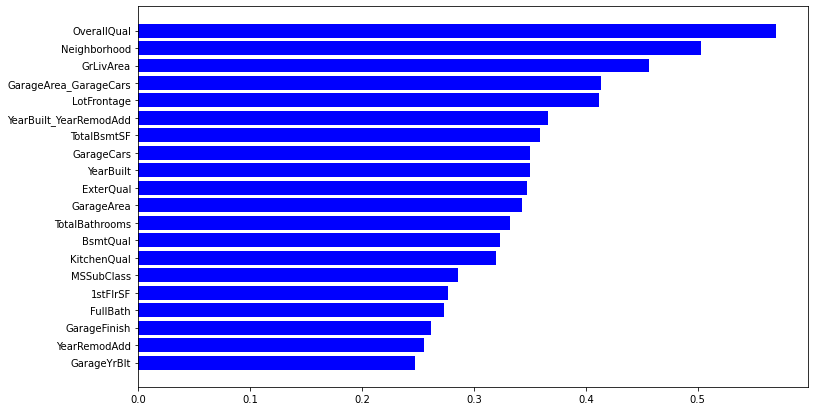

In [88]:
plt.figure(figsize = (12, 7))
plot_mi_scores(mi_scores[:20])

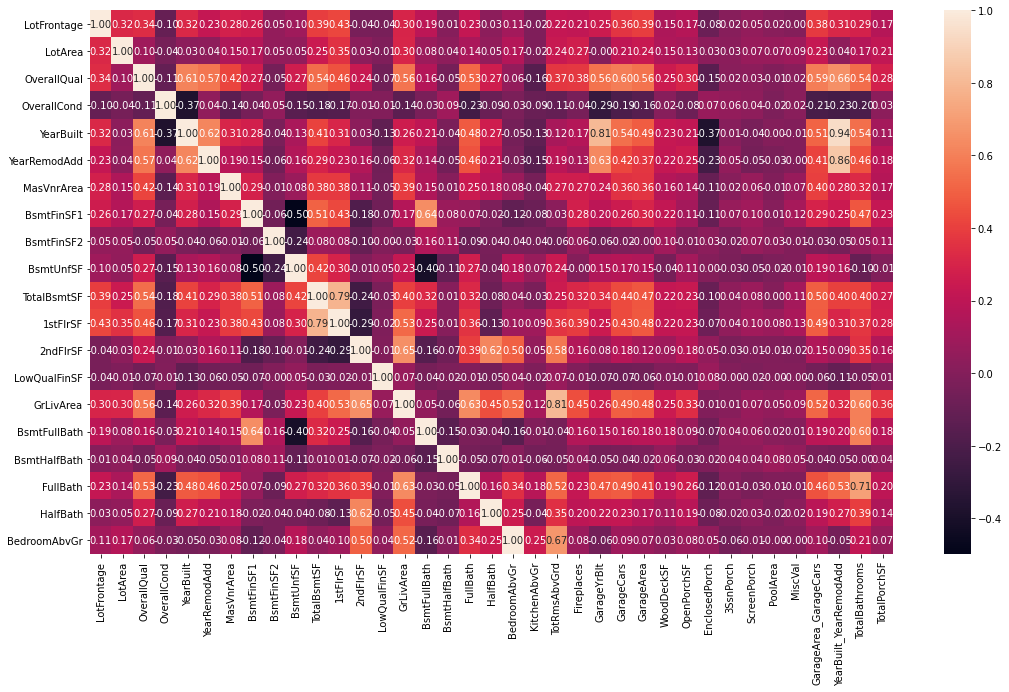

In [91]:
plt.figure(figsize = (18, 10))
sns.heatmap(df_train.corr()[:20], annot = True, fmt = '.2f')
plt.show()

#### Label Encoding

In [92]:
cat_feats = []
for col in df_train.select_dtypes(include = ['object', 'category']):
    cat_feats.append(col)
    
print(f"Number of categorical features: {len(cat_feats)} \n list of categorical features : {cat_feats}")
    
num_feats = []
for col in df_train.select_dtypes(include = ['int64', 'float64']):
    num_feats.append(col)
      
print(f"\nNumber of numeric features: {len(num_feats)} \n list of numeric features : {num_feats}")

Number of categorical features: 43 
 list of categorical features : ['MSSubClass', 'MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']

Number of numeric features: 37 
 list of numeric features : ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenA

The only features we need to label encode are the categorical features but, some of them are norminal and some ordinal. We must preserve this relationship when performing label encoding.

For categorical norminal features we can use **one hot encoding** to perform label encoding while we can do the rest encodings manually since, we need to decide which numeric values to assign our selves.

To decide which values to assign, you can do research online and also refer to the data set description if any.

In [93]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,GarageArea_GarageCars,YearBuilt_YearRemodAdd,TotalBathrooms,TotalPorchSF
0,60,RL,70.000,8450,None,Reg,Lvl,Inside,Gtl,CollgCr,...,None,0,2,2008,WD,Normal,3099.000,4012009,3.500,61
1,20,RL,80.000,9600,None,Reg,Lvl,FR2,Gtl,Veenker,...,None,0,5,2007,WD,Normal,2896.000,3904576,2.500,298
2,60,RL,70.000,11250,None,IR1,Lvl,Inside,Gtl,CollgCr,...,None,0,9,2008,WD,Normal,3217.000,4006002,3.500,42
3,70,RL,70.000,9550,None,IR1,Lvl,Corner,Gtl,Crawfor,...,None,0,2,2006,WD,Abnorml,3924.000,3772550,2.000,307
4,60,RL,88.000,14260,None,IR1,Lvl,FR2,Gtl,NoRidge,...,None,0,12,2008,WD,Normal,4508.000,4000000,3.500,276


In [94]:
cat_feats_ordinal = ['Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 
                     'BldgType', 'RoofStyle', 'RoofMatl', 'ExterQual', 'ExterCond',
                     'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1',
                     'HeatingQC', 'KitchenQual', 'Functional', 
                     'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
                     'PavedDrive', 'Fence']

cat_feats_nominal = ['MSSubClass', 'MSZoning', 'Neighborhood', 'Condition1', 'Condition2', 'HouseStyle', 
                     'CentralAir', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition',
                     'Electrical', 'MasVnrType', 'Exterior1st', 'Exterior2nd', 'Heating', 'Foundation']

In [95]:
df_train['Alley'].replace(to_replace = ['None', 'Grvl', 'Pave'], 
                          value = [0, 1, 2], inplace = True)
df_train['LotShape'].replace(to_replace = ['Reg', 'IR1', 'IR2', 'IR3'], 
                             value = [3, 2, 1,0], inplace = True)
df_train['LandContour'].replace(to_replace = ['Lvl', 'Bnk', 'Low', 'HLS'], 
                                value = [3, 2, 1,0], inplace = True)
df_train['LotConfig'].replace(to_replace = ['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'], 
                              value = [0, 3, 1, 2, 4], inplace = True)
df_train['LandSlope'].replace(to_replace = ['Gtl', 'Mod', 'Sev'], 
                              value =
                              [2, 1, 0], inplace = True)
df_train['BldgType'].replace(to_replace = ['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs'],
                             value = [4, 3, 2, 1, 0], inplace = True)
df_train['RoofStyle'].replace(to_replace = ['Gable', 'Hip', 'Gambrel', 'Mansard', 'Flat', 'Shed'], 
                              value = [4, 2, 3, 1, 5, 0], inplace = True)
df_train['RoofMatl'].replace(to_replace = ['ClyTile', 'CompShg', 'Membran', 'Metal', 'Roll', 'Tar&Grv',
                                           'WdShake', 'WdShngl'], 
                             value = [7, 6, 5, 4, 3, 2, 1, 0], inplace = True)
df_train['ExterQual'].replace(to_replace = ['Ex', 'Gd', 'TA', 'Fa'], 
                              value = [3, 2, 1, 0], inplace = True)
df_train['ExterCond'].replace(to_replace = ['Ex', 'Gd', 'TA', 'Fa', 'Po'], 
                              value = [4, 3, 2, 1, 0], inplace = True)
df_train['BsmtQual'].replace(to_replace = ['Ex', 'Gd', 'TA', 'Fa', 'None'], 
                             value = [4, 3, 2, 1, 0], inplace = True)
df_train['BsmtCond'].replace(to_replace = ['Gd', 'TA', 'Fa', 'Po', 'None'], 
                             value = [4, 3, 2, 1, 0], inplace = True)
df_train['BsmtExposure'].replace(to_replace = ['Gd', 'Av', 'Mn', 'No', 'None'], 
                                 value = [4, 3, 2, 1, 0], inplace = True)
df_train['BsmtFinType1'].replace(to_replace = ['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf', 'None'], 
                                 value = [6, 5, 4, 3, 2, 1, 0], inplace = True)
df_train['BsmtFinType2'].replace(to_replace = ['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf', 'None'], 
                                 value = [6, 5, 4, 3, 2, 1, 0], inplace = True)
df_train['HeatingQC'].replace(to_replace = ['Ex', 'Gd', 'TA', 'Fa', 'Po'], 
                              value = [4, 3, 2, 1, 0], inplace = True)
df_train['KitchenQual'].replace(to_replace = ['Ex', 'Gd', 'TA', 'Fa'], 
                                value = [3, 2, 1, 0], inplace = True)
df_train['Functional'].replace(to_replace = ['Typ', 'Min1', 'Min2', 'Mod',  'Maj1', 'Maj2', 'Sev', 'None'],
                               value = [6, 5, 4, 3, 2, 1, 0, 7], inplace = True)
df_train['FireplaceQu'].replace(to_replace = ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'None'], 
                                value = [5, 4, 3, 2, 1, 0], inplace = True)
df_train['GarageType'].replace(to_replace = ['2Types', 'Attchd', 'Basment', 'BuiltIn', 
                                             'CarPort', 'Detchd', 'None'], 
                               value = [6, 5, 4, 3, 2, 1, 0], inplace = True)
df_train['GarageFinish'].replace(to_replace = ['Fin', 'RFn', 'Unf', 'None'], 
                                 value = [3, 2, 1, 0], inplace = True)
df_train['GarageQual'].replace(to_replace = ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'None'], 
                               value = [5, 4, 3, 2, 1, 0], inplace = True)
df_train['GarageCond'].replace(to_replace = ['Ex', 'Gd', 'TA', 'Fa',  'Po', 'None'], 
                               value = [5, 4, 3, 2, 1, 0], inplace = True)
df_train['PavedDrive'].replace(to_replace = ['Y', 'P', 'N'], value = [2, 1, 0], inplace = True)
df_train['Fence'].replace(to_replace = ['GdPrv', 'MnPrv', 'GdWo', 'MnWw', 'None'], 
                          value = [4, 3, 2, 1, 0], inplace = True)

#### One Hot Encode the categorical norminal features

In [96]:
cat_feats_nominal_one_hot_encoded = pd.get_dummies(df_train[cat_feats_nominal], 
                                                   drop_first = True).reset_index(drop = True)

In [97]:
len(df_train.columns)

80

In [98]:
cat_feats_nominal_one_hot_encoded.head()

,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,...,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
0,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0


In [99]:
df_train = df_train.drop(cat_feats_nominal, axis= 'columns')

In [100]:
df_train = pd.concat([df_train, cat_feats_nominal_one_hot_encoded], axis = 1)

In [101]:
df_train.shape

(2856, 204)

In [104]:
X_train = df_train[:len(y_train)]
test = df_train[len(y_train):]

## Target Variable Analysis and Transformation


- SalePrice is our target variable.
- If we want to predict the target variables accuratly then first task is to understand the underlying behaviour of our target variable.
- Note that model can make more reliable predictions if our target variable is normally distributed.
- We will use both graphical and statastical methods to do normality test of our taret variable.
- Graphical
> 'distplot' and 'probplot' to visualize the target variable distribution.

- Statastical
> We will use Skewness, Kurtosis and Shapiro-Wilk test for normality.

Skewness assesses the extent to which a variable’s distribution is symmetrical. The thumb rule is,

- If the skewness is between -0.5 and 0.5, the data are fairly symmetrical.
- If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed.
- If the skewness is less than -1 or greater than 1, the data are highly skewed.
- Kurtosis tells you the height and sharpness of the central peak, relative to that of a standard bell curve. The thumb rule is,

- Kurtosis greater than +1 indicates distribution is too peaked.
- Kurtosis less than –1 indicates a distribution that is too flat.
- **Note**: The probability plot is a graphical technique for assessing whether or not a data set follows a given distribution such as the normal distribution. The data are plotted against a theoretical distribution in such a way that the points should form approximately a straight line. Departures from this straight line indicate departures from the specified distribution.

In [105]:
def probplot_distplot(y_train):
    fig, axes = plt.subplots(1, 2, figsize = (12, 5))
    sns.distplot(y_train, fit = stats.norm, ax = axes[0])

    # Probability plot
    stats.probplot(y_train, plot = axes[1])
    plt.show()


In [106]:
def skew_kurt(y_train):
    print("Skewness: {:.4f}".format(abs(y_train).skew()))
    print("Kurtosis: {:.4f}".format(abs(y_train).kurt()))
    (mu, sigma) = stats.norm.fit(y_train)
    mode = stats.mode(y_train)[0][0]

    print("mean: {:.3f} median: {:.3f} mode: {:.3f}".format(mu, sigma, mode))

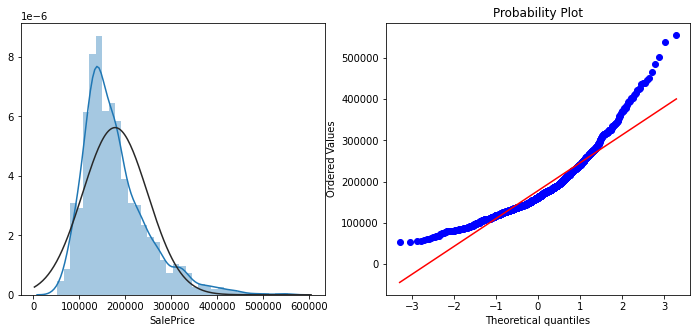

Skewness: 1.3638
Kurtosis: 2.5825
mean: 177783.248 median: 70912.198 mode: 140000.000


In [107]:
probplot_distplot(y_train)
skew_kurt(y_train)

From the above we can conclude that the SalePrice is positively skewed, we can use different methods to make it normal distripution.

In [108]:
"""
 Instaed of log() we are using log1p() 
 log1p() calculates log(1 + x), so it takes of issue of log(0) error 
 For reverse transformation just use expm1()    
"""
y_train = np.log1p(y_train)

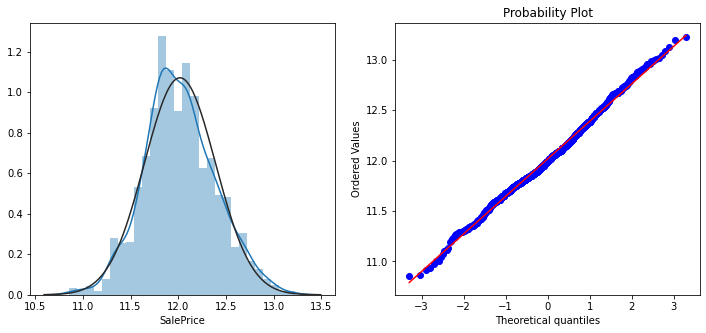

Skewness: 0.1826
Kurtosis: 0.1188
mean: 12.017 median: 0.372 mode: 11.849


In [109]:
probplot_distplot(y_train)
skew_kurt(y_train)

## Model Building :)

In [110]:
import re
from sklearn.model_selection import KFold, cross_val_score, train_test_split

from sklearn import pipeline
from sklearn import preprocessing

from sklearn.linear_model import LinearRegression,ElasticNet, Lasso, BayesianRidge, Ridge
from sklearn import svm
from sklearn.ensemble import  GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from mlxtend.regressor import  StackingCVRegressor

from sklearn.metrics import mean_squared_error

In [111]:
n_folds= 5
random_state = 42
kf = KFold(n_splits = n_folds, random_state = random_state, shuffle = True)

In [112]:
def rmse(y_truth, y_pred):
    return np.sqrt(mean_squared_error(y_truth, y_pred))

def cv_rmse(model):
#     note always keep error_score = "raise" this will alert of error if not you'll just get back nan
    rmse = np.sqrt(-cross_val_score(model, X_train, y_train, cv=kf, scoring="neg_mean_squared_error",
                                    error_score="raise"))
    return (rmse)


cv_scores = []
cv_std = []
kaggle_public_score= []
def score_model(model):
    model_score = cv_rmse(model)
    mean = model_score.mean()
    std = model_score.std()
    print(f"meand: {mean} model std: {std}")
    cv_scores.append(mean)
    cv_std.append(std)
    

#### Linear

- Ordinary least squares Linear Regression.
- LinearRegression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.
- There are now hyperparamters for this model

In [113]:
linear_model = LinearRegression()
score_model(linear_model)

meand: 0.11112540084317697 model std: 0.007043043043439274


#### Bayesian

- BayesianRidge estimates a probabilistic model of the regression.
- Bayesian regression techniques can be used to include regularization parameters in the estimation procedure: the regularization parameter is not set in a hard sense but tuned to the data at hand.
- The advantages of Bayesian Regression are:
> - It adapts to the data at hand.
> - It can be used to include regularization parameters in the estimation procedure.
- The disadvantages of Bayesian regression include:
> - Inference of the model can be time consuming.

In [114]:
bayesian_ridge_reg = BayesianRidge(alpha_1= 2.104047761709729e-05,
                               alpha_2= 8.87111148542247e-06,
                               lambda_1= 0.9517616852006183,
                               lambda_2= 0.016369928482509982,
                               compute_score= False
                              )
score_model(bayesian_ridge_reg)

meand: 0.10377829358136348 model std: 0.005991132543564407


#### Lasso

Linear Model trained with L1 prior as regularizer (aka the Lasso)

In [115]:
lasso_reg = pipeline.Pipeline([("scaling", preprocessing.RobustScaler()),
                               ("lasso", Lasso(alpha= 0.0004225349823414949,
                                               max_iter=1e7,
                                               tol= 0.001,
                                               random_state= random_state))])

score_model(lasso_reg)

meand: 0.1028442775159772 model std: 0.006329266099106582


#### ElasticNet

Linear regression with combined L1 and L2 priors as regularizer.

In [116]:
elastic_net_reg = pipeline.Pipeline([("scaling", preprocessing.RobustScaler()),
                               ("elastic_net", ElasticNet(alpha=0.0005033042674715873,
                                                          l1_ratio=0.8201479505715717,
                                                          positive= True,
                                                          precompute=False,
                                                          selection='random',
                                                          max_iter=1e7,
                                                          tol= 0.001,
                                                          random_state= random_state))])

score_model(elastic_net_reg)


meand: 0.10287728566113467 model std: 0.006318920663806371


#### Ridge Regression

Linear least squares with L2 regularization

This model solves a regression model where the loss function is the linear least squares function and regularization is given by the l2-norm. Also known as Ridge Regression or Tikhonov regularization. This estimator has built-in support for multi-variate regression

In [117]:
ridge_reg = pipeline.Pipeline([("scaling", preprocessing.RobustScaler()),
                               ("ridge", Ridge(alpha= 12.773681311355642,
                                               random_state= random_state))])

score_model(ridge_reg)

meand: 0.10384463397271948 model std: 0.005795393621267855


#### SVM

- Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.
- For regression problems we use Support Vector Regression method.
- The model produced by Support Vector Regression depends only on a subset of the training data, because the cost function ignores samples whose prediction is close to their target.

In [118]:
svr_reg = pipeline.Pipeline([("scaling", preprocessing.RobustScaler()),
                               ("svr", svm.SVR(C= 46,
                                               epsilon= 0.009019504329938493,
                                               gamma= 0.0003434802243340735))])

score_model(svr_reg)

meand: 0.1560129705353098 model std: 0.007653551498859324


### Ensemble Methods

The goal of ensemble methods is to combine the predictions of several base estimators built with a given learning algorithm in order to improve generalizability / robustness over a single estimator.
Two families of ensemble methods are usually distinguished:

In **averaging methods**, the driving principle is to build several estimators independently and then to average their predictions. On average, the combined estimator is usually better than any of the single base estimator because its variance is reduced. Examples: Bagging methods, Forests of randomized trees,etc

By contrast, in **boosting methods**, base estimators are built sequentially and one tries to reduce the bias of the combined estimator. The motivation is to combine several weak models to produce a powerful ensemble. Examples: AdaBoost, Gradient Tree Boosting, etc

The module sklearn.ensemble provides methods for both classification and regression via gradient boosted decision trees.

#### Gradient Boost ingRegressor

GBR supports a number of different loss functions for regression which can be specified via the argument loss; the default loss function for regression is least squares ('ls')

In [119]:
gbr_reg = GradientBoostingRegressor(n_estimators=2501,
                                      learning_rate= 0.03221041191991256,
                                      random_state = random_state)
    
score_model(gbr_reg)

meand: 0.11165243069842543 model std: 0.007237681212233805


#### LightGradientBoostingMachine(LGBM)


- LightGBM is a gradient boosting framework based on decision trees to increases the efficiency of the model and reduces memory usage.
- It uses two novel techniques: Gradient-based One Side Sampling and Exclusive Feature Bundling (EFB) which fulfills the limitations of histogram-based algorithm that is primarily used in all GBDT (Gradient Boosting Decision Tree) frameworks.

In [120]:
lgbm_reg = LGBMRegressor(objective='regression',
                          lambda_l1=2.6767384983882573e-06,
                          lambda_l2=1.3831822594594483e-07,
                          num_leaves=7,
                          feature_fraction=0.40037639693376437,
                          bagging_fraction=0.484921703394593,
                          bagging_freq=7,
                          min_child_samples=31,
                          learning_rate=0.00886005156619629,
                          n_estimators=3389,
                          max_bin=219,
                          min_data_in_leaf=2,
                          min_sum_hessian_in_leaf=0.0018863384096746397,
                          random_state= random_state)

score_model(lgbm_reg)

[LightGBM] [Warning] feature_fraction is set=0.40037639693376437, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.40037639693376437
[LightGBM] [Warning] lambda_l1 is set=2.6767384983882573e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.6767384983882573e-06
[LightGBM] [Warning] bagging_fraction is set=0.484921703394593, subsample=1.0 will be ignored. Current value: bagging_fraction=0.484921703394593
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0.0018863384096746397, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=0.0018863384096746397
[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=31 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] lambda_l2 is set=1.3831822594594483e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3831822594594483e-07
[LightGBM] [

#### XGBoost (Extreme gradient boosting)

- XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework.
- XGBoost stands for "Extreme Gradient Boosting" we can use it to solve classification and regression problems.
- The XGBoost is a popular supervised machine learning model with characteristics like computation speed, parallelization, and performance.

In [121]:
xgb_reg = XGBRegressor(learning_rate=0.00922801668420645,
                         n_estimators=4492,
                         max_depth=4,
                         min_child_weight= 0.019476741626353912,
                         gamma=0.0038933017613795614,
                         subsample=0.3075828286669299,
                         colsample_bytree=0.16053941121623433,
                         scale_pos_weight=3,
                         reg_alpha=6.89051576939588e-05,
                         objective='reg:squarederror',
                         random_state= random_state)

score_model(xgb_reg)

meand: 0.10391866099412013 model std: 0.004838871749104922


## Model Stacking

Reading resource: http://rasbt.github.io/mlxtend/user_guide/regressor/StackingCVRegressor/

[video resource 1](https://www.youtube.com/watch?v=8T2emza6g80)

[video resource 2](https://www.youtube.com/watch?v=lcXKFS65BI0)

![stacinkgPic](stackingPic.png)

#### This model which trains and makes predictions on the same training dataset is prone to overfitting, that is why the previous stacking methodology applies CV
![stacinkgPic1](stackingPic1.png)


#### Cross Validation
![crossValidation](crossValidation.png)

In [122]:
regressors = ( linear_model, svr_reg, bayesian_ridge_reg, ridge_reg, lasso_reg,
              elastic_net_reg, gbr_reg, lgbm_reg, xgb_reg )
final_estimator = xgb_reg

# build a stacked model
stacking_cv_reg = StackingCVRegressor(regressors = regressors,
                                     meta_regressor = final_estimator,
                                     use_features_in_secondary= True)

In [123]:
# perform cross validation on the stack model
score_model_reg = np.sqrt(-cross_val_score(stacking_cv_reg, X_train.values, y_train.values, 
                                           scoring="neg_mean_squared_error", cv=kf, error_score = "raise"))

print(f'score_model_reg => mean: {score_model_reg.mean()}, std: {score_model_reg.std()}')
cv_scores.append(score_model_reg.mean())
cv_std.append(score_model_reg.std())

[LightGBM] [Warning] feature_fraction is set=0.40037639693376437, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.40037639693376437
[LightGBM] [Warning] lambda_l1 is set=2.6767384983882573e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.6767384983882573e-06
[LightGBM] [Warning] bagging_fraction is set=0.484921703394593, subsample=1.0 will be ignored. Current value: bagging_fraction=0.484921703394593
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0.0018863384096746397, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=0.0018863384096746397
[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=31 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] lambda_l2 is set=1.3831822594594483e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3831822594594483e-07
[LightGBM] [

[LightGBM] [Warning] feature_fraction is set=0.40037639693376437, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.40037639693376437
[LightGBM] [Warning] lambda_l1 is set=2.6767384983882573e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.6767384983882573e-06
[LightGBM] [Warning] bagging_fraction is set=0.484921703394593, subsample=1.0 will be ignored. Current value: bagging_fraction=0.484921703394593
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0.0018863384096746397, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=0.0018863384096746397
[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=31 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] lambda_l2 is set=1.3831822594594483e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3831822594594483e-07
[LightGBM] [

[LightGBM] [Warning] feature_fraction is set=0.40037639693376437, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.40037639693376437
[LightGBM] [Warning] lambda_l1 is set=2.6767384983882573e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.6767384983882573e-06
[LightGBM] [Warning] bagging_fraction is set=0.484921703394593, subsample=1.0 will be ignored. Current value: bagging_fraction=0.484921703394593
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0.0018863384096746397, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=0.0018863384096746397
[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=31 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] lambda_l2 is set=1.3831822594594483e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3831822594594483e-07
[LightGBM] [

[LightGBM] [Warning] feature_fraction is set=0.40037639693376437, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.40037639693376437
[LightGBM] [Warning] lambda_l1 is set=2.6767384983882573e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.6767384983882573e-06
[LightGBM] [Warning] bagging_fraction is set=0.484921703394593, subsample=1.0 will be ignored. Current value: bagging_fraction=0.484921703394593
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0.0018863384096746397, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=0.0018863384096746397
[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=31 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] lambda_l2 is set=1.3831822594594483e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3831822594594483e-07
[LightGBM] [

## Model Blending

In [164]:
models_with_weights = {linear_model: 0.003,
                       svr_reg: 0.003,
                       bayesian_ridge_reg: 0.003,
                       ridge_reg: 0.05,
                       lasso_reg: 0.1,
                       elastic_net_reg: 0.1,
                       gbr_reg: 0.1,
                       lgbm_reg: 0.1,
                       xgb_reg: 0.1,
                       stacking_cv_reg: 0.435}

# Contains predicted values for SalePrice
blended_train_pred = pd.DataFrame()
blended_test_pred = pd.DataFrame()
for model, weight in models_with_weights.items():
    # print(f"Model: {str(model)}, Weight: {weight}")    
    if re.search('StackingCVRegressor', str(model), re.I):
        # For stacking_cv model we will pass 'train.values' and 'test.values',
#         To avoid error : ValueError: feature_names mismatch:
        # Ref. https://datascience.stackexchange.com/questions/19575/xgbclassifier-error-valueerror-feature-names-mismatch
        model.fit(X_train.values, y_train)
        blended_train_pred[model] = weight * model.predict(X_train.values)
        blended_test_pred[model] = weight * model.predict(test.values)
    else:
        model.fit(X_train, y_train)
        blended_train_pred[model] = weight * model.predict(X_train)
        blended_test_pred[model] = weight * model.predict(test)
        
print(f'blended_train_pred.shape: {blended_train_pred.shape}')
print(f'blended_test_pred.shape: {blended_test_pred.shape}')

# Find score using full training data
train_score = rmse(y_train, blended_train_pred.sum(axis='columns'))
print(f'train score: {train_score}')
# Predict on test data
test_pred = np.floor(np.expm1 (blended_test_pred.sum(axis='columns') )) # Contains predicted values for SalePrice

[LightGBM] [Warning] feature_fraction is set=0.40037639693376437, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.40037639693376437
[LightGBM] [Warning] lambda_l1 is set=2.6767384983882573e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.6767384983882573e-06
[LightGBM] [Warning] bagging_fraction is set=0.484921703394593, subsample=1.0 will be ignored. Current value: bagging_fraction=0.484921703394593
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0.0018863384096746397, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=0.0018863384096746397
[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=31 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] lambda_l2 is set=1.3831822594594483e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3831822594594483e-07
[LightGBM] [

## Creat Submission File

In [165]:
# !touch submission_file_self.csv
!mv submissionFile.csv submissionFile_self.csv

mv: cannot stat 'submissionFile.csv': No such file or directory


In [166]:
def create_submission_file(submission_file_name, predications, train_score):
    submission = pd.read_csv("submissionFile_self.csv")
    submission.iloc[:, 1] = predications

    file_name = submission_file_name + '_ts_' + str(np.round(train_score, 4)) + '.csv'
   
    submission.to_csv(file_name, index=False)
    print(f"create_submission_file()> Submission file {file_name} saved")
    return file_name


file_name = create_submission_file("kaggle_blending_linear_model", test_pred, train_score)

create_submission_file()> Submission file kaggle_blending_linear_model_ts_0.0867.csv saved


## Pickle The model

In [ ]:
import pickle

pickle.dump(stacking_cv_reg, open("stackedModel.pk", "wb"))

In [ ]:
model = pickle.load(open("stackedModel.pk", "rb"))